In [2]:
# import essential libraries

import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf
import itertools
import numpy as np 
import matplotlib.pyplot as plt 
import nltk 
import re
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
dataset = pd.read_csv("/content/drive/MyDrive/IMDB movies/IMDB Dataset.csv")
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
X = dataset["review"].values
y = dataset["sentiment"].values
y = [1 if i=="positive" else 0 for i in y]

In [7]:
# preprocessing of data

stemmer =  PorterStemmer()
corpus = []

def process(X,output):
    for i in range(0,len(X)):
      review = re.compile(r'<[^>]+>').sub(' ', X[i])
      review = re.sub('[^a-zA-Z]',' ', review)
      review = review.lower()
      review = review.split()
      review = [stemmer.stem(w) for w in review if w not in stopwords.words('english')]
      review = " ".join(review)
      output.append(review)
    print("Pre-processing of the data has been finished !!!")

In [8]:
process(X, corpus)

Pre-processing of the data has been finished !!!


In [9]:
len(corpus)

50000

In [10]:
X_train = list(corpus[:40000])
X_valid = list(corpus[40000:45000])
X_test = list(corpus[45000:50000])
y_train = list(y[:40000])
y_valid = list(y[40000:45000])
y_test = list(y[45000:50000])

In [11]:
tokenizer = Tokenizer(num_words=50000,oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

X_train_sequence = tokenizer.texts_to_sequences(X_train)
padded_X_train = pad_sequences(X_train_sequence,padding="post" ,maxlen=300, truncating="post")

X_test_sequence = tokenizer.texts_to_sequences(X_test)
padded_X_test = pad_sequences(X_test_sequence,padding="post" ,maxlen=300, truncating="post")

X_valid_sequence = tokenizer.texts_to_sequences(X_valid)
padded_X_valid = pad_sequences(X_valid_sequence,padding="post" ,maxlen=300, truncating="post")

In [12]:
# Now convert all list to numpy array before feeding to network

padded_X_train = np.array(padded_X_train)
padded_X_test = np.array(padded_X_test)
padded_X_valid = np.array(padded_X_valid)
y_train = np.array(y_train)
y_test = np.array(y_test)
y_valid = np.array(y_valid)

In [13]:
padded_X_train.shape, padded_X_test.shape, padded_X_valid.shape, y_train.shape, y_test.shape, y_valid.shape    

((40000, 300), (5000, 300), (5000, 300), (40000,), (5000,), (5000,))

In [14]:
# model architecture

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(50000,32,input_length=300))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 32)           1600000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8

In [16]:
# Now specify loss, optimizer and metrics arguments

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the model

history = model.fit(x=padded_X_train, y=y_train, validation_data=(padded_X_valid, y_valid), epochs=20, batch_size=16)

Epoch 1/20
2500/2500 [==============================] - 38s 14ms/step - loss: 0.4709 - accuracy: 0.7449 - val_loss: 0.3511 - val_accuracy: 0.8514
Epoch 2/20
2500/2500 [==============================] - 35s 14ms/step - loss: 0.2101 - accuracy: 0.9183 - val_loss: 0.2620 - val_accuracy: 0.8928
Epoch 3/20
2500/2500 [==============================] - 35s 14ms/step - loss: 0.1499 - accuracy: 0.9436 - val_loss: 0.2818 - val_accuracy: 0.8924
Epoch 4/20
2500/2500 [==============================] - 36s 14ms/step - loss: 0.1131 - accuracy: 0.9567 - val_loss: 0.3236 - val_accuracy: 0.8854
Epoch 5/20
2500/2500 [==============================] - 37s 15ms/step - loss: 0.0928 - accuracy: 0.9638 - val_loss: 0.4131 - val_accuracy: 0.8820
Epoch 6/20
2500/2500 [==============================] - 36s 15ms/step - loss: 0.0762 - accuracy: 0.9701 - val_loss: 0.5564 - val_accuracy: 0.8570
Epoch 7/20
2500/2500 [==============================] - 37s 15ms/step - loss: 0.0687 - accuracy: 0.9718 - val_loss: 0.5506 -

In [17]:
# evaluation of model
loss, accuracy = model.evaluate(padded_X_test, y_test)
print("Loss :-", loss)
print("Accuracy :-", accuracy*100)

157/157 [==============================] - 0s 2ms/step - loss: 1.3332 - accuracy: 0.8692
Loss :- 1.333190679550171
Accuracy :- 86.91999912261963


In [18]:
# model prediction

y_pred = model.predict(padded_X_test)
y_pred = [np.round(i) for i in y_pred]

Confusion matrix, without normalization
[[2177  353]
 [ 301 2169]]


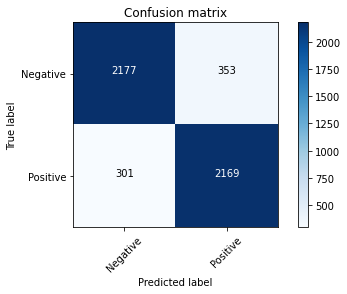

In [19]:
# function to plot the confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
cm = confusion_matrix(y_test, y_pred)
cm_plot_labels = ['Negative', 'Positive']
plot_confusion_matrix(cm, cm_plot_labels)

In [20]:
# now reverse the word_index 
rev_word_index = dict([(value,key) for (key,value) in word_index.items()])

# helper function for decoding
def decode(text):
    return " ".join([rev_word_index.get(i,'?') for i in text])

In [36]:
# now test the model on new data

def pred_func(test_sent):
    test_seq = tokenizer.texts_to_sequences(test_sent)
    padded_test = pad_sequences(test_seq, padding="post", maxlen=300,truncating="post")
    res = model.predict(padded_test)
    if res<0.5:
      return 0
    else:
      return 1

In [40]:
pred = pred_func([X_test[228]])
print("Actual output :-",y_test[228])
print("Predicted output :-", pred)

Actual output :- 0
Predicted output :- 0


In [42]:
# save the model

model.save("/content/drive/MyDrive/IMDB movies/sentiment_classifier.h5")